In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
import math

In [203]:
# root_dir of where the data is
root_dir = '../../data/'

# Location of images.
image_dir = root_dir + 'imags/'

# Location of where to write features.
feature_dir = root_dir + 'features/'

# The .csv file containing the image names and classes.
image_file = root_dir + 'image_names_classes.csv'

In [204]:
# Number of images.
n_images = 218

# Read image names and classes .csv file.
image_names_classes = pd.read_csv(image_file, header=None )


In [205]:
# Read the features from the .csv file.
#feature_filename = feature_dir + 'stdev.txt'
#feature_filename = feature_dir + 'mean_stdev.txt'
#feature_filename = feature_dir + 'mean_stdev_median_var.txt'
feature_filename = feature_dir + 'mean_stdev_512.txt'
features = np.genfromtxt(feature_filename, delimiter=',')

# Determine feature dimension.
fdim = np.shape(features)[1]
#fdim=1

In [206]:
# Create a dictionary for the classes 
dic_classes={}
dic_classes[1]=26
dic_classes[2]=25
dic_classes[3]=37
dic_classes[4]=58
dic_classes[5]=72

In [207]:
# Compute recall and precision



# Retrieve top k images.
k = 5

# Compute Euclidean distance between query feature vector and each image's feature vector.


precision_dict={}
recal_dict={}

precision_mean_list=[]
recall_mean_list=[]

for query_image in range(n_images):
    distances = np.zeros(n_images)
    precision_dict[query_image]=np.zeros(n_images)
    recal_dict[query_image]=np.zeros(n_images)
    for i in range(n_images):
        distances[i] = 0
        for j in range(fdim):
            #distances[i] = distances[i] + ((features[query_image][j] - features[i][j])**2) #L2 distance
            #distances[i] = distances[i] + abs((features[query_image][j] - features[i][j])) #L1 distance
            distances[i] = distances[i] + (abs(features[query_image][j] - features[i][j]))**3 #Minkowski distance
            #distances[i] = distances[i] + abs((features[query_image] - features[i])) #stdv distance
        #distances[i] = distances[i] ** 0.5 #L2 distance
        distances[i] = distances[i] ** (1/3) #Minkowski distance
    sorted_index = np.argsort(distances)
    #print(sorted_index)
    count = 0
    total_no_images=0
    for s in range(len(sorted_index)):
            if image_names_classes[1][query_image] == image_names_classes[1][sorted_index[s]]:
               count += 1
            precision = count / (s+1)
            precision_dict[query_image][s]=precision
            recall = count / dic_classes[image_names_classes[1][query_image]]
            recal_dict[query_image][s]=recall
  

In [208]:
#Interpolation with rec_ref
precision_dict_interpolated={}

rec_ref=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]


for query_image in range(n_images):
    pr_point =precision_dict[query_image]

    rec_point=recal_dict[query_image]

    precision_dict_interpolated[query_image]=[0] * (len(recal_dict[0]))
    for r in range(len(rec_ref)):
        indexs= np.where(rec_point >= rec_ref[r])
        #print(indexs[0][0])
        precision_dict_interpolated[query_image][r]=pr_point[indexs[0][0]]
        
                

0.36382718401759084


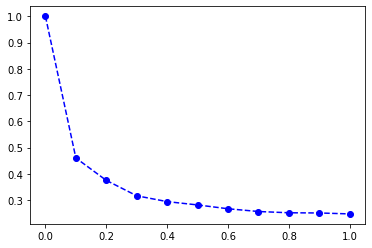

In [209]:
# Plot precision - recall curve
sum_precision = [0] * (11)
avg_precision_list = [0] * (11)
for query_image in range(n_images):
    for x in range(11):
        sum_precision[x] += precision_dict_interpolated[query_image][x]
    
for query_image in range(11):
    avg_precision_list[query_image]=sum_precision[query_image]/n_images

print(st.mean(avg_precision_list))

plt.plot(rec_ref, avg_precision_list, '--bo')
plt.show()

In [171]:
print(avg_precision_list)

[1.0, 0.43329012731751076, 0.37199943764786825, 0.3219469536339728, 0.2890091547414326, 0.27434704694133794, 0.2636626221884066, 0.2524166563860977, 0.24957764286142567, 0.2509931825778137, 0.24569449113489186]


In [ ]:

precision_dict_interpolated={}

rec_ref=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]


for query_image in range(n_images):
    pr_point =precision_dict[query_image]

    rec_point=recal_dict[query_image]

    precision_dict_interpolated[query_image]=[0] * (11)
    ind=0
    for r in range(len(rec_point)):
        
        for j in range(ind, len(rec_ref)):
            if rec_ref[j] <= rec_point[r]:
               ind += 1
               precision_dict_interpolated[query_image][ind-1] = pr_point[r]
                
 